<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Estocastico_Aula_F_675_SEP_12_Rv_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteración 0, costo = 8.934905529019504, w = 1.0093469517364042, b = 0.0597826246630892
Iteración 10, costo = 14.221515595340962, w = 1.0679507053117598, b = 0.45054407461049417
Iteración 20, costo = 2.845351461031384, w = 1.353177202346895, b = 0.8786202864689188


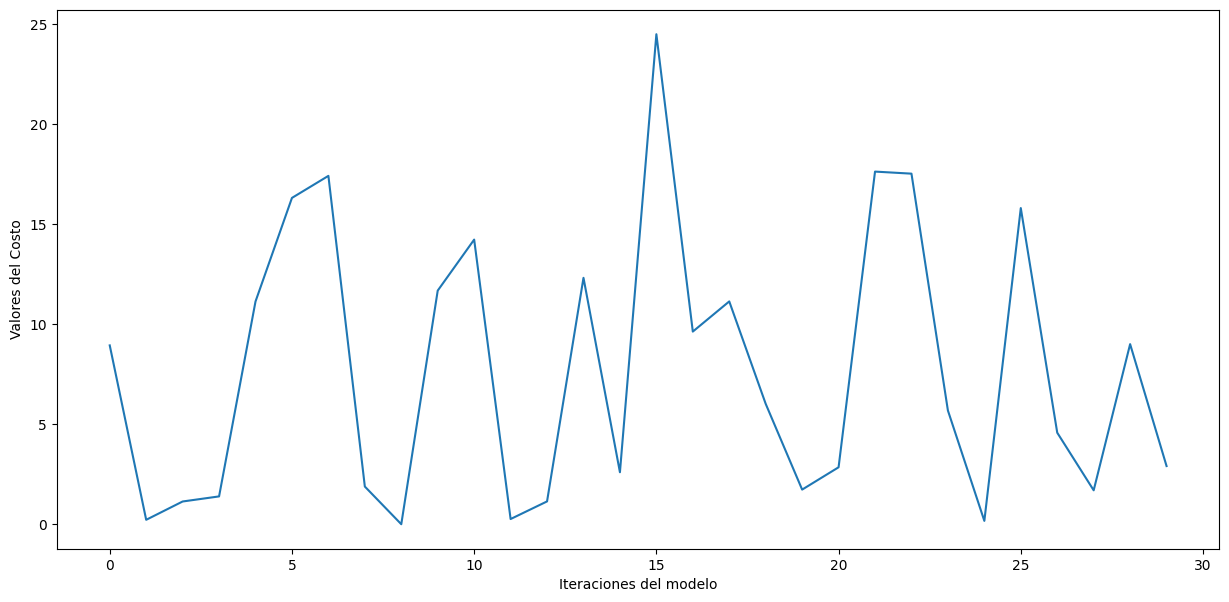

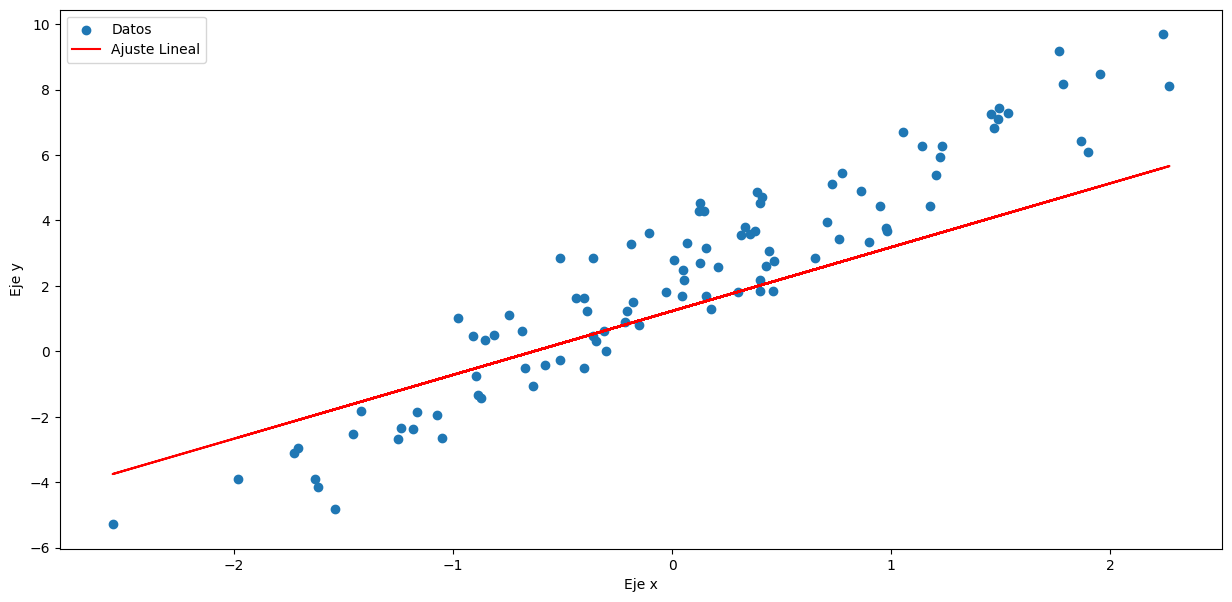

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # Fijar la semilla para reproducibilidad--
x = np.random.randn(100)  # Generar 100 características aleatorias
y = 3 * x + 2 + np.random.randn(100)  # Generar 100 etiquetas con ruido
iteraciones = 30
alpha = 0.01  # Tasa de aprendizaje

# Función de costo
def costo(w, b, x_i, y_i):
    return ((w * x_i + b) - y_i) ** 2

# Gradiente de la función de costo para un solo punto de datos
def gradiente_w(w, b, x_i, y_i):
    return 2 * ((w * x_i + b) - y_i) * x_i

def gradiente_b(w, b, x_i, y_i):
    return 2 * ((w * x_i + b) - y_i)

# Descenso de gradiente estocástico
def descenso_gradiente_sgd(w, b, x, y, alpha, iteraciones):
    # Inicializar el historial de costo y parámetro
    historial_costo = []
    historial_w = [w]
    historial_b = [b]

    # Repetir hasta alcanzar el número máximo de iteraciones
    for i in range(iteraciones):

        # Seleccionar un punto de datos aleatorio
        random_index = np.random.randint(len(x))
        x_i, y_i = x[random_index], y[random_index]

        # Calcular el costo y los gradientes para el punto de datos actual
        costo_actual = costo(w, b, x_i, y_i)
        gradiente_w_actual = gradiente_w(w, b, x_i, y_i)
        gradiente_b_actual = gradiente_b(w, b, x_i, y_i)

        # Actualizar los parámetros usando el descenso de gradiente
        w = w - alpha * gradiente_w_actual
        b = b - alpha * gradiente_b_actual

        # Guardar el costo y los parámetros actuales en el historial
        historial_costo.append(costo_actual)
        historial_w.append(w)
        historial_b.append(b)

        # Mostrar el progreso cada 10 iteraciones
        if i % 10 == 0:
            print(f"Iteración {i}, costo = {costo_actual}, w = {w}, b = {b}")

    # Devolver el historial de costo, parámetros w y b
    return historial_costo, historial_w, historial_b

# Llamada a la función descenso_gradiente_sgd con valores iniciales
w_inicial = 1.0  # Cambia este valor si lo deseas
b_inicial = 0.0  # Valor inicial para el sesgo
historial_costo, historial_w, historial_b = descenso_gradiente_sgd(w_inicial, b_inicial, x, y, alpha, iteraciones)

# Graficar el valor del costo MSE
plt.figure(figsize=(15, 7))
plt.plot(historial_costo, label='MSE')
plt.xlabel("Iteraciones del modelo")
plt.ylabel("Valores del Costo")
plt.show()

# Graficar los datos y el ajuste lineal final
plt.figure(figsize=(15, 7))
plt.scatter(x, y, label='Datos')
plt.plot(x, historial_w[-1] * x + historial_b[-1], color='red', label='Ajuste Lineal')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.legend()
plt.show()


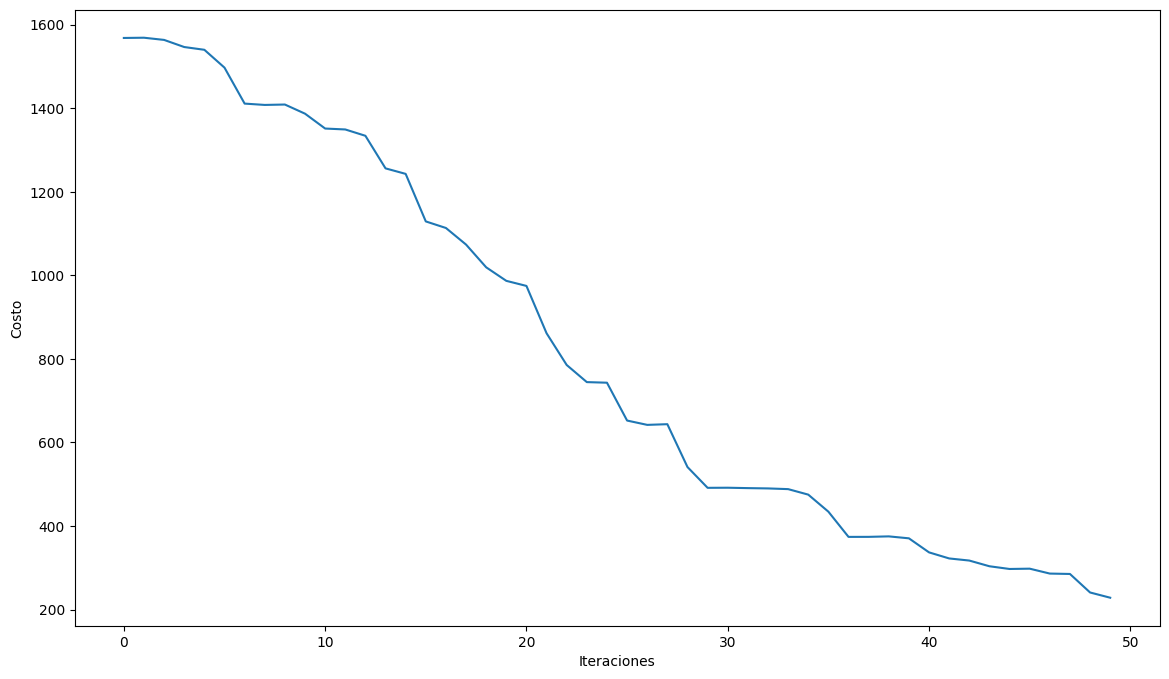

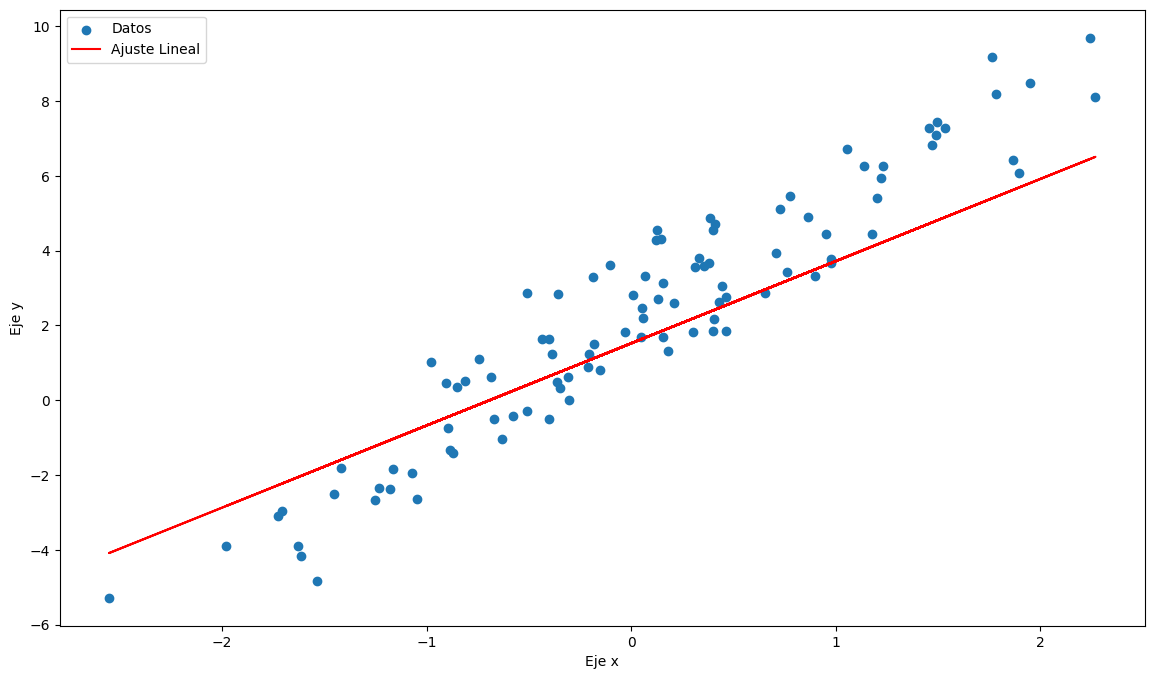

Valor final de w (pendiente): 2.1969317687128824
Valor final de b (sesgo): 1.520932880461982


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Función de costo para regresión lineal simple
def f(w, b):
    return np.sum((w * X + b - y)**2)

# Derivadas
def df_dw(w, b, xi, yi):
    return 2 * (w * xi + b - yi) * xi

def df_db(w, b, xi, yi):
    return 2 * (w * xi + b - yi)

# Dataset
np.random.seed(0)  # Fijar la semilla para reproducibilidad--
X = np.random.randn(100)  # Generar 100 características aleatorias
y = 3 * x + 2 + np.random.randn(100)  # Generar 100 etiquetas con ruido

# Hiperparámetros
lr = 0.01
iters = 50

# Inicialización de pesos y sesgo
w = 0
b = 0
costs = []

for i in range(iters):
    # SGD: Tomar un punto de datos al azar
    random_index = np.random.randint(len(X))
    xi = X[random_index]
    yi = y[random_index]
    gradient_w = df_dw(w, b, xi, yi)
    gradient_b = df_db(w, b, xi, yi)
    w -= lr * gradient_w
    b -= lr * gradient_b

    # Guardamos el costo
    cost = f(w, b)
    costs.append(cost)
plt.figure(figsize=(14, 8))
# Gráfica de la función de costo a lo largo de las iteraciones
plt.plot(costs)
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.show()

# Gráfica de los datos y el ajuste lineal final
plt.figure(figsize=(14, 8))
plt.scatter(X, y, label='Datos')
plt.plot(X, w * X + b, color='red', label='Ajuste Lineal')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.legend()
plt.show()

print("Valor final de w (pendiente):", w)
print("Valor final de b (sesgo):", b)
